<a href="https://colab.research.google.com/github/aurorali17/STA365/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
import pandas as pd
import requests
import random
import os

os.chdir('/content/drive/MyDrive')

data = pd.read_csv("bodyfat.csv")
data.describe()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


PART 1: question1
create binary variable

In [ ]:

percentile_75th = data['BodyFat'].quantile(0.75)

# Create a binary variable based on the 75th percentile
data['HighBodyFat'] = (data['BodyFat'] > percentile_75th).astype(int)

percentile_75th, data.head()


(25.3,
    Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
 0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
 1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
 2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
 3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
 4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   
 
    Knee  Ankle  Biceps  Forearm  Wrist  Age_standardized  Weight_standardized  \
 0  37.3   21.9    32.0     27.4   17.1         -1.736617            -0.839575   
 1  37.3   23.4    30.5     28.9   18.2         -1.815970            -0.193078   
 2  38.9   24.0    28.8     25.2   16.6         -1.815970            -0.848082   
 3  37.3   22.8    32.4     29.4   18.2         -1.498561             0.198223   
 4  42.2   24.0    32.2     27.7   17.7         -1.657265             0.181210   
 
    HighBod

PART 1: queation1

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'beta'}>], dtype=object)

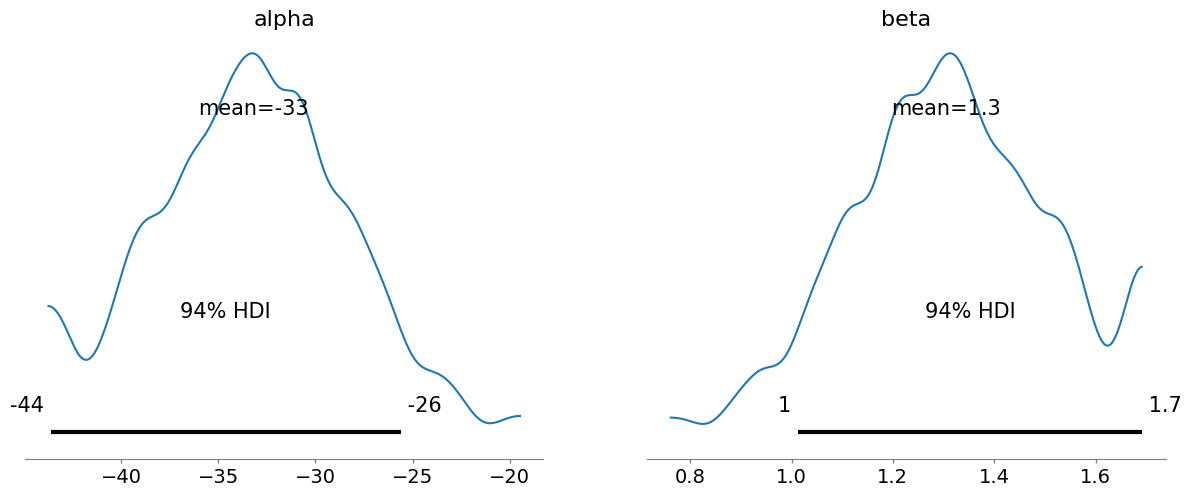

In [ ]:
import pymc as pm
import numpy as np


X = data['BodyFat'].values[:, None]  # Independent variable
y = data['HighBodyFat'].values  # Dependent variable

with pm.Model() as logistic_model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10)

    mu = alpha + beta * X.squeeze()

    p = pm.math.sigmoid(mu)

    observed = pm.Bernoulli("observed", p=p, observed=y)

    trace = pm.sample(1000, tune=2000, target_accept=0.95, return_inferencedata=True)

import arviz as az
az.plot_posterior(trace)


question 2 :

In [ ]:
import pymc as pm
import numpy as np

n, p = 100, 10
X, y = np.zeros((n, p)), np.ones((n, 1)).squeeze()
with pm.Model() as logistic_model:
    betas = pm.MvNormal('betas', mu=np.zeros(p), cov=np.eye(p), shape=p)
    p_y = pm.math.sigmoid(pm.math.dot(X, betas))
    y_obs = pm.Bernoulli('y_obs', p=p_y, observed=y)

with logistic_model:
    idata = pm.sample()


question 3: I use a Normal(0, 10) prior for each coefficient, reflecting a weak prior belief

In [ ]:
import pymc as pm
import numpy as np


n, p = X.shape

with pm.Model() as logistic_model:
    # Priors for regression coefficients
    betas = pm.Normal('betas', mu=0, sigma=10, shape=p)

    p_y = pm.math.sigmoid(pm.math.dot(X, betas))
    y_obs = pm.Bernoulli('y_obs', p=p_y, observed=y)

with logistic_model:
    idata = pm.sample()


PART 2 :


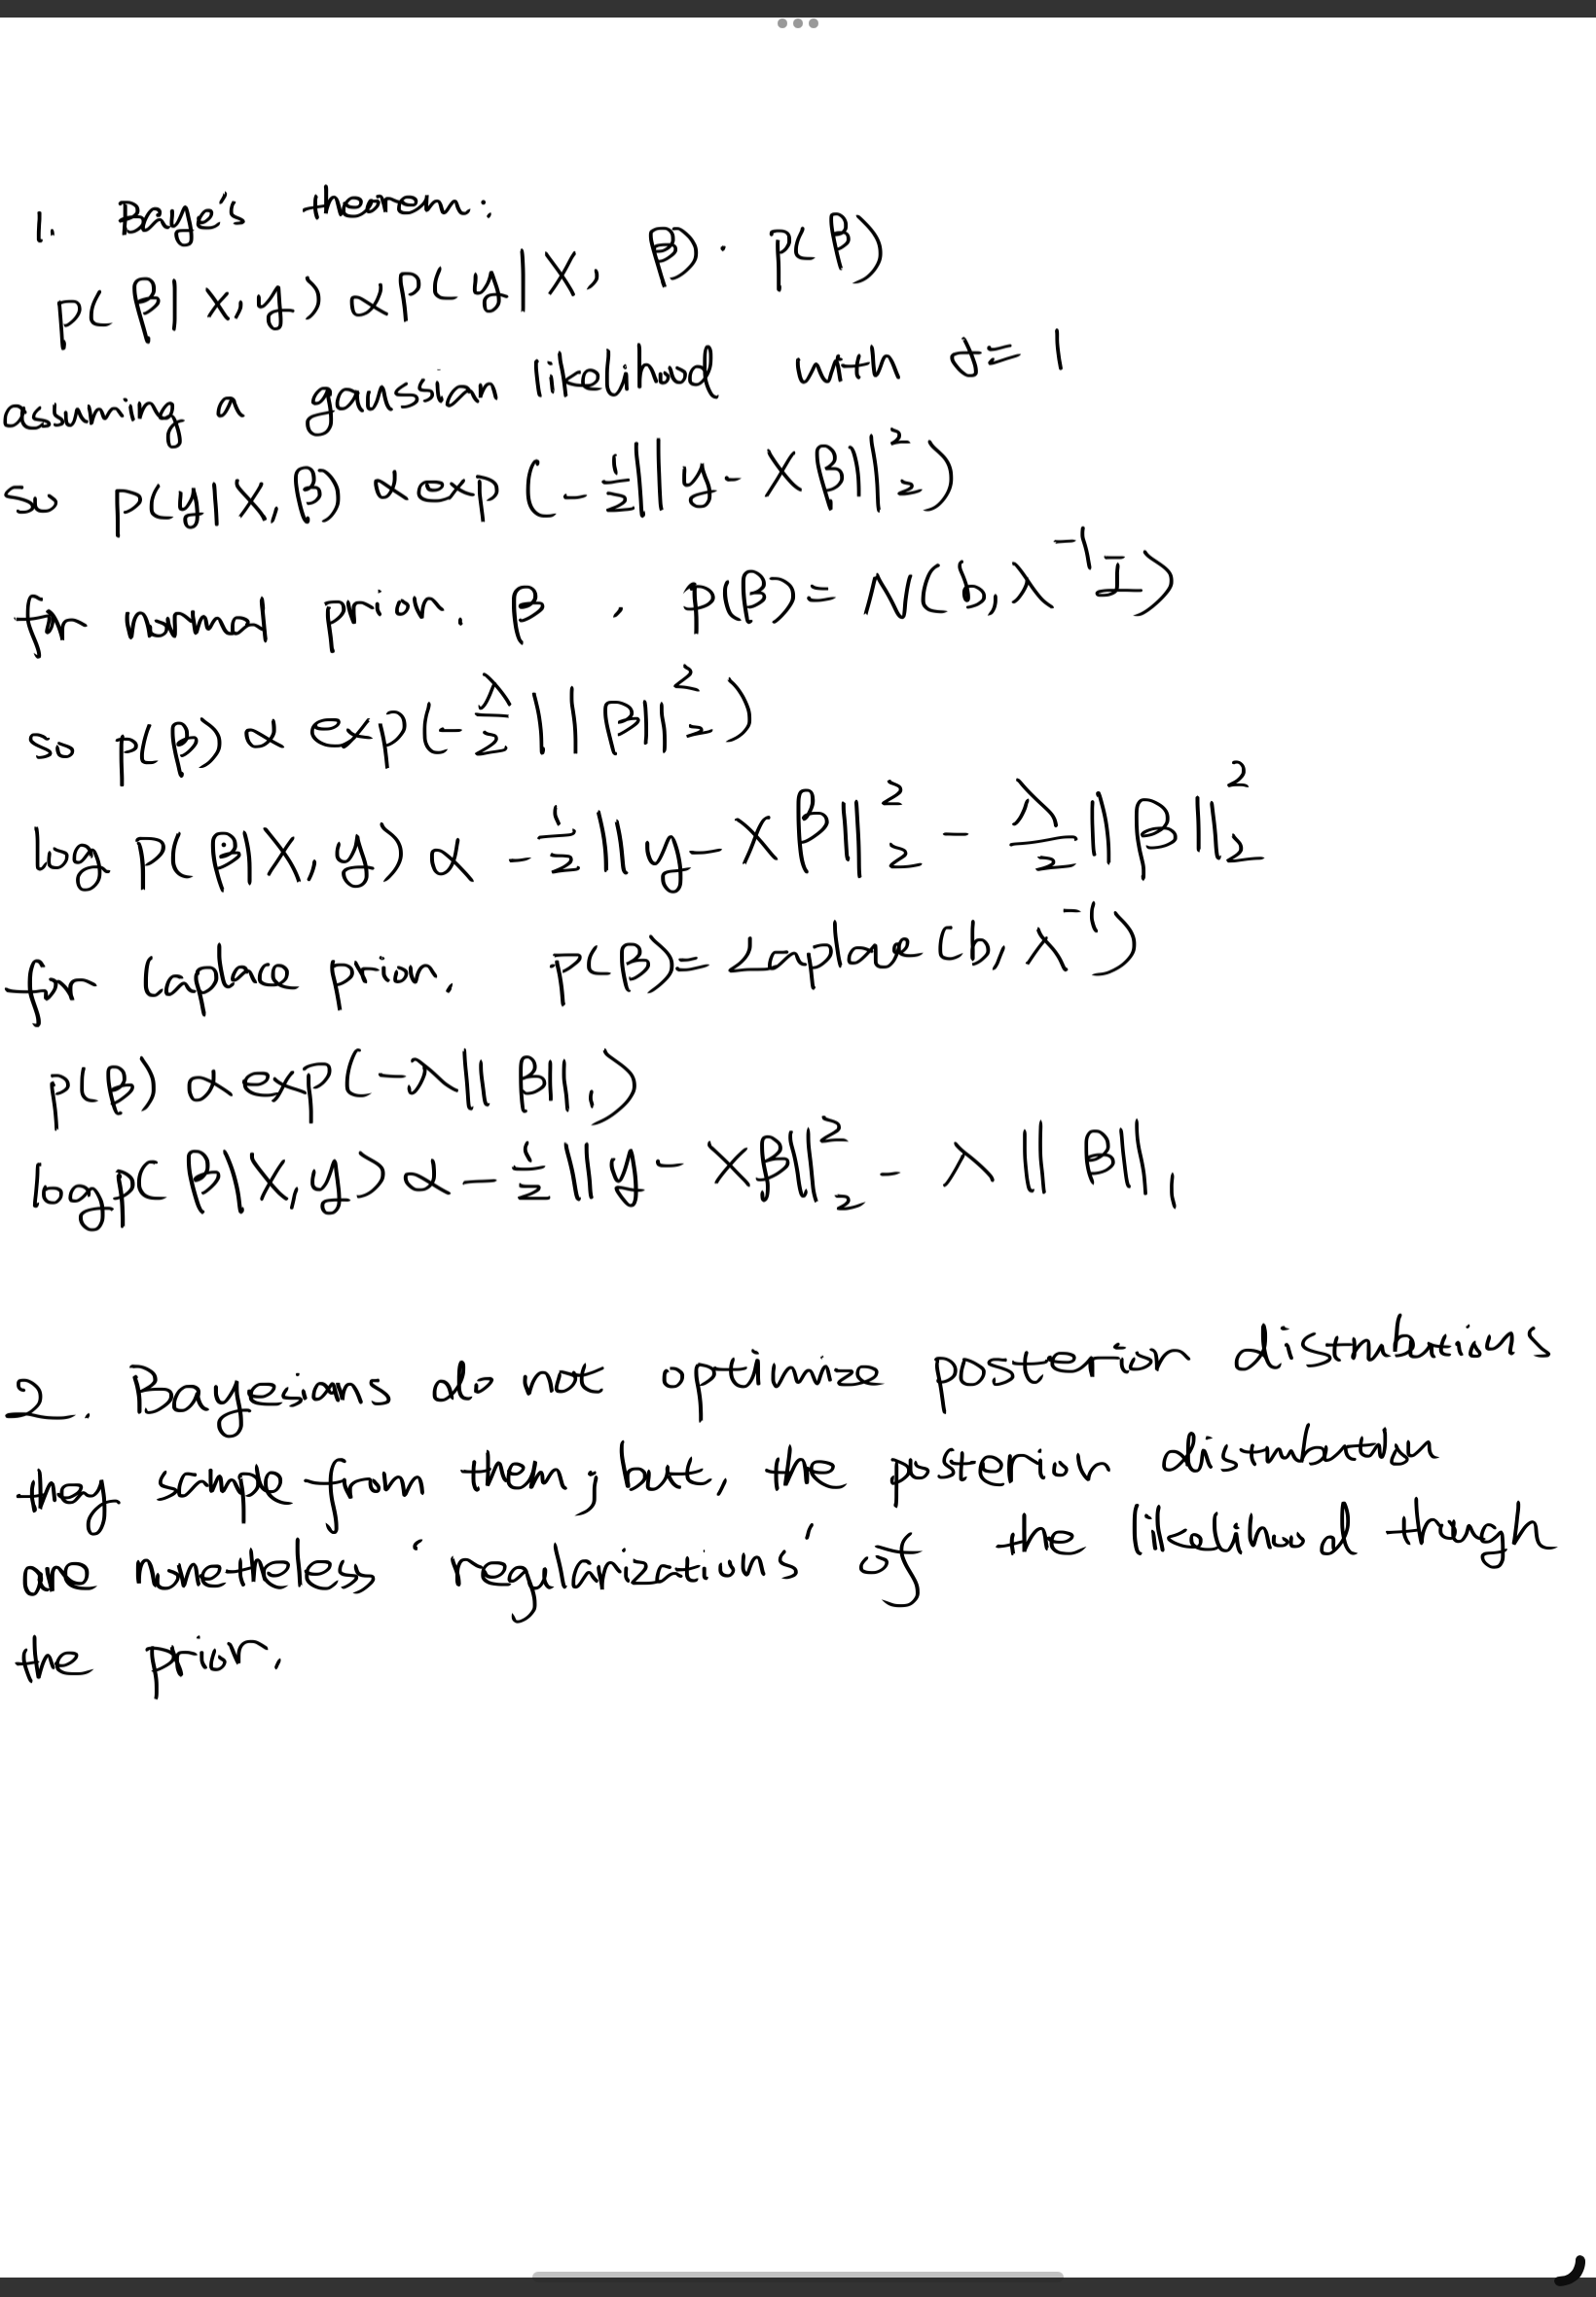